In [76]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors

In [77]:
# Create a molecule from SMILES
m = Chem.MolFromSmiles('Cc1ccccc1')

# Get number of atoms and bonds
num_atoms = m.GetNumAtoms()
num_bonds = m.GetNumBonds()

# Convert back to SMILES
smiles = Chem.MolToSmiles(m)

# Additional methods
first_atom = m.GetAtomWithIdx(0)
first_bond = m.GetBondWithIdx(0)
mol_weight = Descriptors.MolWt(m)

# Output results
print(f"Number of atoms: {num_atoms}")
print(f"Number of bonds: {num_bonds}")
print(f"SMILES: {smiles}")
print(f"First atom: {first_atom.GetSymbol()}")
print(f"First bond type: {first_bond.GetBondTypeAsDouble()}")
print(f"Molecular weight: {mol_weight}")

Number of atoms: 7
Number of bonds: 7
SMILES: Cc1ccccc1
First atom: C
First bond type: 1.0
Molecular weight: 92.14099999999999


DRAWING

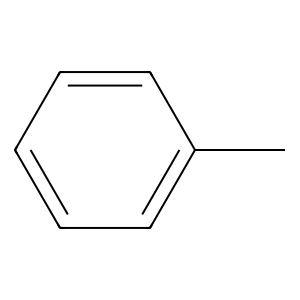

In [78]:
img = Draw.MolToImage(m)
img

In [79]:
penicillin_g_smiles = 'CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)COC3=CC=CC=C3)C(=O)O)C'
penicillin_g = Chem.MolFromSmiles(penicillin_g_smiles)

# draw molecule
# Draw.MolToFile(penicillin_g, 'penicillin.png') #size=(200, 200))

PANDAS

In [80]:
df = pd.read_csv('/Users/tatianasalamatova/chemoinformatics/02/delaney-processed.csv')

Все соединения у которых молекулярная масса от 200 до 400 включительо

In [81]:
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [82]:
lower_bound = 200
upper_bound = 400

filter_df = df[(df['Molecular Weight'] >= lower_bound) & (df['Molecular Weight'] <= upper_bound)]

sorted_df = filter_df.sort_values(by='Molecular Weight')

print(sorted_df[['Compound ID', 'Molecular Weight']].head(-5))

                   Compound ID  Molecular Weight
347            Ethyl decanoate           200.322
1                     Fenfuram           201.225
952                   Carbaryl           201.225
686                   simazine           201.661
92                Fluoranthene           202.256
..                         ...               ...
268  1,2,4,5-Tetrabromobenzene           393.698
500                   Dialifos           393.854
260                   Dialifor           393.854
9                     Rotenone           394.423
62               Triamcinolone           394.439

[459 rows x 2 columns]
